# Crane optimization
Here is some text explaining the problem at hand.

Also necessary optimization theory from a high level.

And maybe a figure.

And here is some math:
$$
e^{i \pi} + 1 = 0
$$

In [60]:
# Enable interactive plot
# %matplotlib notebook
%matplotlib inline

In [61]:
import numpy as np
from matplotlib import pyplot as plt
import casadi as cs
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')

In [62]:
r = cs.SX.sym('r')
theta = cs.SX.sym('theta')
r_dot = cs.SX.sym('r_dot')
theta_dot = cs.SX.sym('theta_dot')
x = cs.vertcat(r, theta, r_dot, theta_dot)

F = cs.SX.sym('F')
tau = cs.SX.sym('tau')
u = cs.vertcat(F, tau)

m_1 = 1.0
m_2 = 1.0
l = 1.0
g = 9.81

M_inv = cs.SX(2,2)
M_inv[0,0] = m_2 * l**2
M_inv[0,1] = - m_2 * l * cs.cos(theta)
M_inv[1,0] = - m_2 * l * cs.cos(theta)
M_inv[1,1] = m_1 + m_2
M_inv = M_inv / ((m_1 + m_2) * m_2 * l**2 - m_2**2 * l**2 * cs.cos(theta)**2)

h = cs.SX(2,1)
h[0,0] = -m_2 * l * theta_dot**2 * cs.sin(theta)
h[1,0] = m_2 * l * g * cs.sin(theta)

x_dot = cs.vertcat(x[2:], cs.mtimes(M_inv, (u - h)))
f = cs.Function('f', [x, u], [x_dot])



In [63]:
def integrate_RK4(x_k, u_k, f, dt):
    k1 = f(x_k, u_k)
    k2 = f(x_k + dt*k1/2.0, u_k)
    k3 = f(x_k + dt*k2/2.0, u_k)
    k4 = f(x_k + dt*k3, u_k)
    return np.array(x_k + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)).squeeze()

In [64]:
N = 1000
dt = 0.01
T = N * dt
x_0 = np.array([0.0, 0.4, 0.0, 0.0])

x_sim = np.zeros((N+1,4))
u_sim = np.zeros((N,2))
x_sim[0,:] = x_0
for k in range(N):
    x_sim[k+1,:] = integrate_RK4(x_sim[k], u_sim[k], f, dt)

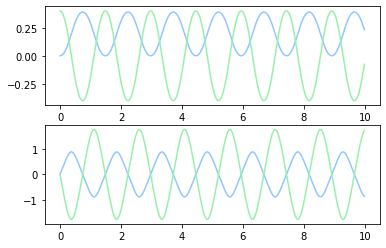

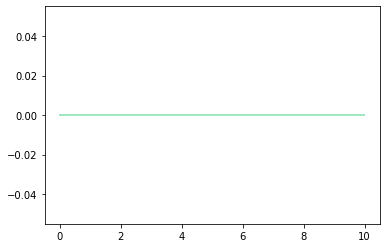

In [65]:
t = np.array([dt*i for i in range(N)])

fig, axs = plt.subplots(2)

axs[0].plot(t, x_sim[:N,0])
axs[0].plot(t, x_sim[:N,1])

axs[1].plot(t, x_sim[:N,2])
axs[1].plot(t, x_sim[:N,3])

plt.figure()
plt.step(t, u_sim, where='post')

plt.show()

(-1.5, 0.5)

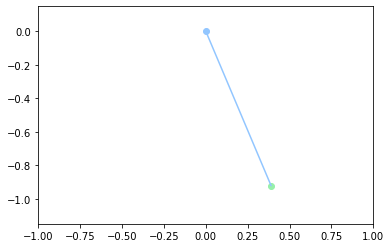

In [66]:
plt.figure()
plt.scatter(x_sim[0,0], 0)
x_pendulum = l * np.sin(x_sim[0,1])
y_pendulum = -l * np.cos(x_sim[0,1])
plt.plot([x_sim[0,0], x_pendulum], [0, y_pendulum])
plt.scatter(x_pendulum, y_pendulum)
plt.axis('equal')
plt.xlim([-1, 1])
plt.ylim([-1.5, 0.5])


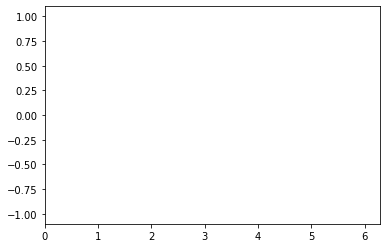

In [68]:
fig, ax = plt.subplots()
line, = ax.plot([])     # A tuple unpacking to unpack the only plot
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.1, 1.1)

def animate(frame_num):
    y = np.sin(x + 2*np.pi * frame_num/100)
    line.set_data((x, y))
    return line

anim = FuncAnimation(fig, animate, frames=100, interval=20)
plt.show()